## Building a prediction model to predict the age that a participant started drinking alcohol
**This is private data. Please do not share**

* Date: 2018 - 01 - 04

* Version: 1
* Editors: Fionn Delahunty 

------- 

This notebook (R code) trys to build a prediction  model to predict the age that a participant started drinking alcohol. 

__Summary of steps__

_ Exploratory data analysis _ 
1. Dataset import - Data splitting (test,train) - Create new varible 
2. Begin Multinomial logistic regression 


------
__ Conclusion __

We didn't perform the Multinomial logistic regression. 


### 1. Dataset import - Data splitting (test,train) - Create new varible 

In [1]:
original_data <- read.csv(file="RISKLAB_10_11_17.csv", header=TRUE, sep=",")

In [2]:
test_data <- original_data[1:200,]
data <- original_data[201:1569,]

Data is our training set, unless otherwise noted all following analysis is on this subsection of the dataset

In [3]:
names(data)

[1] "X"                                                                             
  [2] "Timestamp"                                                                     
  [3] "ID"                                                                            
  [4] "GENDER"                                                                        
  [5] "AGE"                                                                           
  [6] "DATE_OF_BIRTH"                                                                 
  [7] "NATIONALITY"                                                                   
  [8] "COUNTRY_OF_RESIDENCE"                                                          
  [9] "ENGLISH_FIRST_LENGUAGE"                                                        
 [10] "IF_NOT_ENGLISH_SPECIFY"                                                        
 [11] "HIGHEST_LEVEL_EDUCATION"                                                       
 [12] "OCCUPATION"                                                                    
 [13] "DOMINANT_HAND"                                                                 
 [14] "DO_YOU_DRIVE"                                                                  
 [15] "CURRENTLY_LEARNING_DRIVE"                                                      
 [16] "CURRENTLY_HOLD_LEARNING_DRIVER_PERMIT"                                         
 [17] "CURRENTLY_HOLD_FULL_DRIVING_LICENSE"                                           
 [18] "RECEIVE_FULL_DRIVING_LICENSE"                                                  
 [19] "AGE_STARTED_DRIVING"                                                           
 [20] "AVERAGE_KM_MILEAGE_PER_YEAR"                                                   
 [21] "HAVE_PENALTY_POINTS"                                                           
 [22] "PENALTY_POINTS_FOR_WHAT"                                                       
 [23] "COLLISIONS_LAST_TWO_YEARS"                                                     
 [24] "HOW_MANY_COLLISIONS_LAST_TWO_YEARS"                                            
 [25] "HOW_SERIOUS_COLLISIONS"                                                        
 [26] "FOR_HOW_MANY_WERE_CULPABLE"                                                    
 [27] "EVER_SMOKED"                                                                   
 [28] "SMOKE_CURRENTLY"                                                               
 [29] "HOW_MANY_YEARS_SMOKING"                                                        
 [30] "HOW_MANY_CIGARETTES_PER_WEEK"                                                  
 [31] "EVER_DRANK_ALCOHOL"                                                            
 [32] "DRINK_CURRENTLY"                                                               
 [33] "HOW_MANY_YEARS_DRINKING"                                                       
 [34] "HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK"                                            
 [35] "PREVIOUSLY_DIAGNOSED_HEALTH_CONDITION_REQUIRING_SIGNIFICANT_LIFESTYLE_CHANGES."
 [36] "CONSIDER_YOURSELF_RISKTAKER"                                                   
 [37] "DEAL_WITH_RISK_AND_UNCERTANTLY_DAILY_BASIS"                                    
 [38] "Admitting.that.your.tastes.are.different.from.those.of.a.friend"               
 [39] "Going.camping.in.the.wilderness"                                               
 [40] "Betting.a.day.s.income.at.the.horse.races"                                     
 [41] "Investing.10..of.your.annual.income.in.a.moderate.growth.mutual.fund"          
 [42] "Drinking.heavily.at.a.social.function"                                         
 [43] "Taking.some.questionable.deductions.on.your.income.tax.return"                 
 [44] "Disagreeing.with.an.authority.figure.on.a.major.issue"                         
 [45] "Betting.a.day.s.income.at.a.high.stake.poker.game"                             
 [46] "Having.an.affair.with.a.married.man.woman"                                     


In [4]:
table(data$AGE_Started)


   -2     0     2     5     6     9    10    11  11.5    12  12.5    13  13.5 
    2   202     2     2     1     3     5     5     1    10     1    29     4 
   14  14.5    15  15.5    16  16.5    17  17.5 17.75  17.8    18  18.5    19 
   62     2   133    15   214    19   187    28     1     2   186     8    61 
 19.5    20  20.5    21    22  22.5 22.75    23  23.9    24  24.5    25    26 
    3    53     4    33    17     1     1     8     1     7     1     5     5 
   27    28  28.8    29    30    31  31.5  31.8  31.9    33    34    35    37 
    8     2     1     4     5     1     1     1     1     2     1     1     2 
   38    39    43  43.5    45    52    58    70 
    1     2     1     1     1     1     1     1 

In [5]:
data$AGE_Started[data$AGE_Started == "-2"] <- 2

In [6]:
is.numeric(data$AGE_Started)

[1] TRUE


    0     2     5     6     9    10    11  11.5    12  12.5    13  13.5    14 
  202     4     2     1     3     5     5     1    10     1    29     4    62 
 14.5    15  15.5    16  16.5    17  17.5 17.75  17.8    18  18.5    19  19.5 
    2   133    15   214    19   187    28     1     2   186     8    61     3 
   20  20.5    21    22  22.5 22.75    23  23.9    24  24.5    25    26    27 
   53     4    33    17     1     1     8     1     7     1     5     5     8 
   28  28.8    29    30    31  31.5  31.8  31.9    33    34    35    37    38 
    2     1     4     5     1     1     1     1     2     1     1     2     1 
   39    43  43.5    45    52    58    70 
    2     1     1     1     1     1     1 

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,1363,14.87014,7.392304,16,15.40683,2.9652,0,70,70,-0.1598258,4.398155,0.2002313


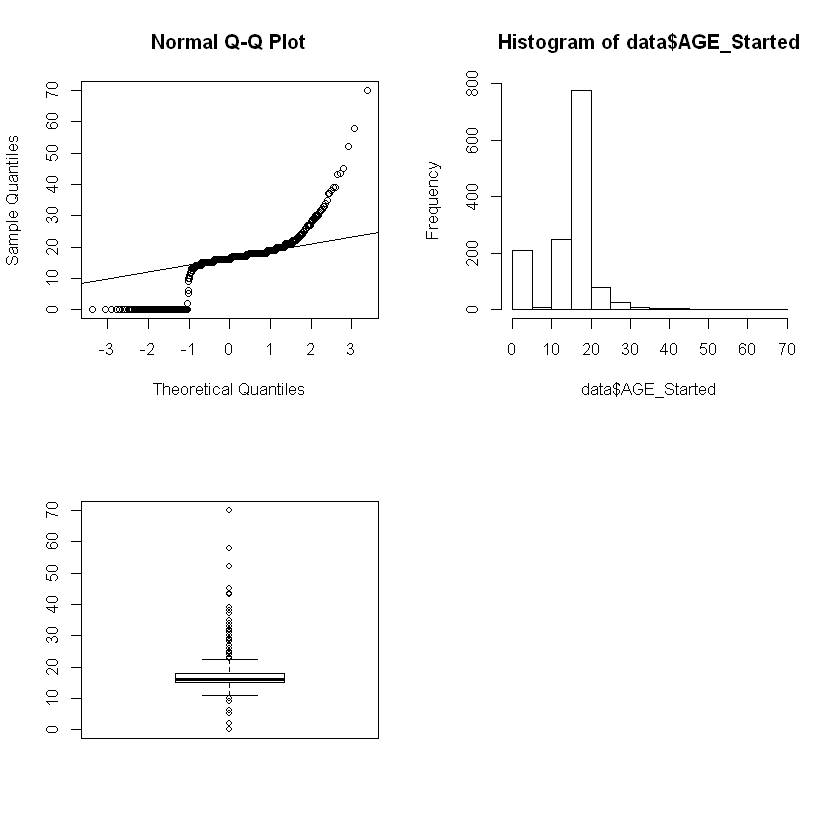

In [7]:
library(psych)
table(data$AGE_Started)
describe(data$AGE_Started)
par(mfrow = c(2,2))

qqnorm(data$AGE_Started)
qqline(data$AGE_Started)

hist(data$AGE_Started)
boxplot(data$AGE_Started)





12 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 
 1  1  2  2  1 46 42 69 82 75 77 84 73 63 46 48 49 55 53 35 43 39 27 25 18 16 
39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 
13 17  6 15 13 15 15 14 19 15  4 10 10 17  9 11  4  4 11  8  4  1  6  4  2  1 
65 67 68 69 70 71 72 74 75 76 78 80 
 2  9  5  5  6  2  1  1  1  1  2  2 

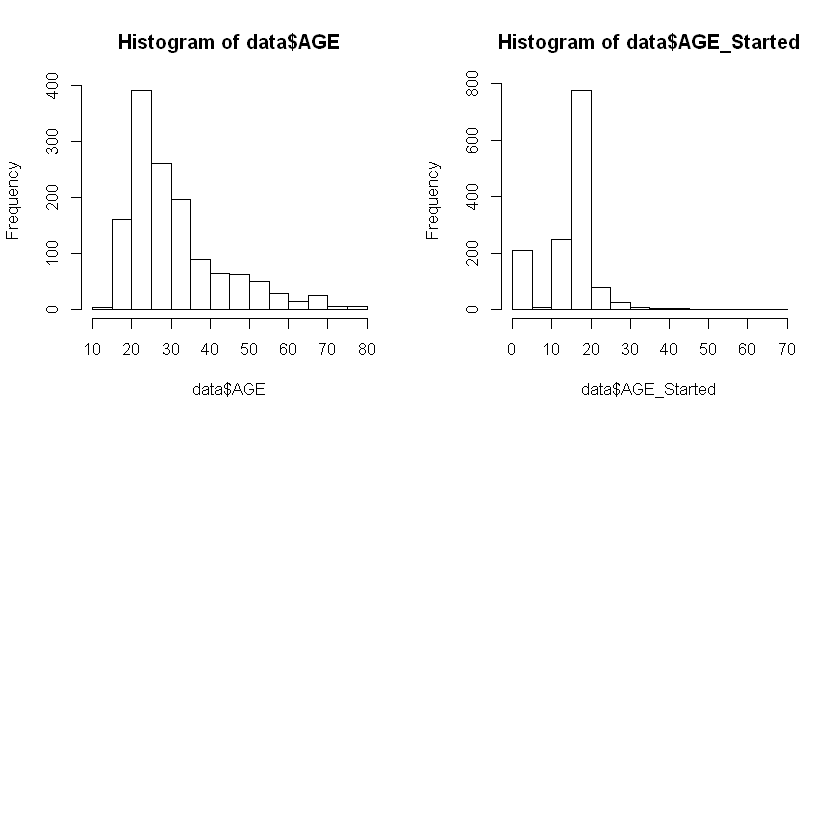

In [8]:
par(mfrow = c(2,2))
hist(data$AGE)
hist(data$AGE_Started)
table(data$AGE)

In [9]:
table(data$AGE_Started)


    0     2     5     6     9    10    11  11.5    12  12.5    13  13.5    14 
  202     4     2     1     3     5     5     1    10     1    29     4    62 
 14.5    15  15.5    16  16.5    17  17.5 17.75  17.8    18  18.5    19  19.5 
    2   133    15   214    19   187    28     1     2   186     8    61     3 
   20  20.5    21    22  22.5 22.75    23  23.9    24  24.5    25    26    27 
   53     4    33    17     1     1     8     1     7     1     5     5     8 
   28  28.8    29    30    31  31.5  31.8  31.9    33    34    35    37    38 
    2     1     4     5     1     1     1     1     2     1     1     2     1 
   39    43  43.5    45    52    58    70 
    2     1     1     1     1     1     1 

Create new varible 

__Coding:__
* 1 : Started drinking beloew the age of 17 
* 2 : Started drinking at the age of 18 (Between 17 and 19 incluves) 
* 3 : Started drinking after the age of 19. 

In [16]:
data$AGE_Started_group[data$AGE_Started == 0] <- 0
data$AGE_Started_group[findInterval(data$AGE_Started, c(1,17)) == 1L] <- 1
data$AGE_Started_group[findInterval(data$AGE_Started, c(17,20)) == 1L] <- 2
data$AGE_Started_group[data$AGE_Started > 19] <- 3
table(data$AGE_Started_group)


  0   1   2   3 
202 510 473 178 

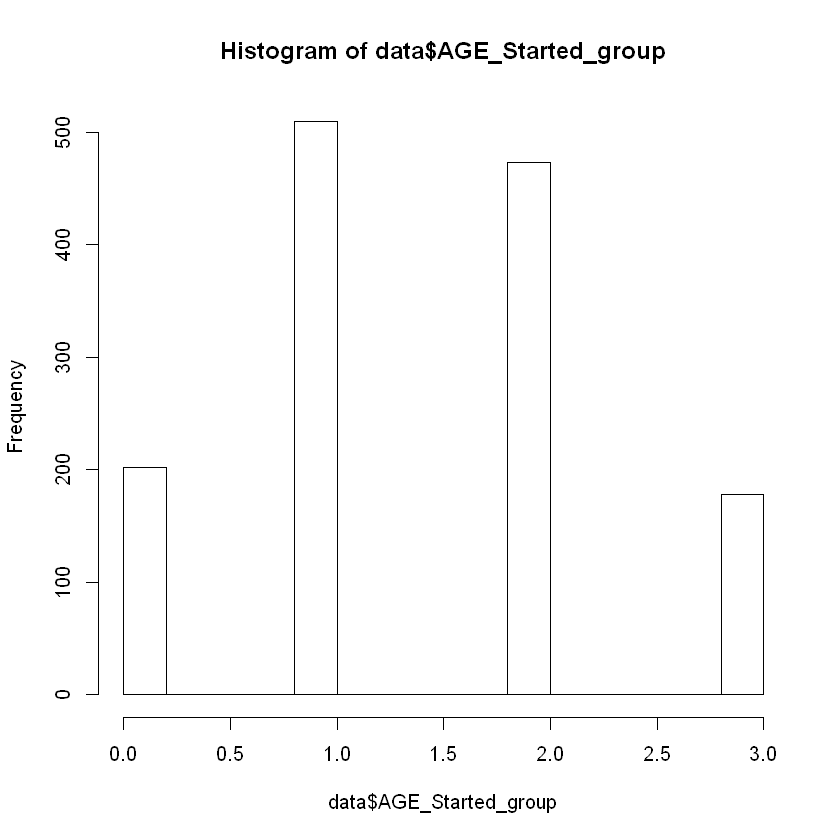

In [17]:
hist(data$AGE_Started_group)

### 2. Multinomial logistic regression 
* Used because we have a number of levels in the DV 
* We start by choosing the IV and testing collinetary 

#### Test Collintary 